# Decision Tree on Titanic_train_dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1) Load Dataset

In [2]:
df=pd.read_csv("C:\\Users\\Krishna\\Desktop\\dataset\\Titanic_train.csv")
df

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,158,1,"Hipkins, Mr. William Edward",male,55.0,0,0,680,50.0000,C39,S,NaN,NaN,London / Birmingham,0
846,174,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.7000,B37,C,NaN,258.0,"Buffalo, NY",0
847,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S,12,NaN,"Moscow / Bronx, NY",1
848,1112,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,NaN,NaN,NaN,0


### 2) Clean Dataset

In [3]:
df["age"]=df["age"].fillna(df["age"].median())
df["name"]=df["name"].fillna("u")
#df["embarked"]=df["embarked"].fillna("u")
df["cabin"]=df["cabin"].fillna(method="pad")
df["fare"]=df["fare"].fillna(method="pad")
df["boat"]=df["boat"].fillna(0)
df["body"]=df["body"].fillna(df["body"].median())
df["home.dest"]=df["home.dest"].fillna("u")

In [4]:
df.isna().sum()

passenger_id     0
pclass           0
name             0
sex              0
age              0
sibsp            0
parch            0
ticket           0
fare             0
cabin           10
embarked         1
boat             0
body             0
home.dest        0
survived         0
dtype: int64

### 3) To apply Feature Engineering

In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["sex"]=le.fit_transform(df["sex"])
df["embarked"]=df["embarked"].fillna(df["embarked"].mode()[0])
df[["embarked"]]=df[["embarked"]].apply(le.fit_transform)

In [6]:
df

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",0,28.0,0,0,335432,7.7333,NaN,1,13,166.0,u,1
1,699,3,"Cacic, Mr. Luka",1,38.0,0,0,315089,8.6625,NaN,2,0,166.0,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",0,30.0,1,1,345773,24.1500,NaN,2,0,166.0,u,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",0,54.0,1,3,29105,23.0000,NaN,2,4,166.0,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",1,40.0,0,0,28221,13.0000,NaN,2,0,166.0,"Barre, Co Washington, VT",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,158,1,"Hipkins, Mr. William Edward",1,55.0,0,0,680,50.0000,C39,2,0,166.0,London / Birmingham,0
846,174,1,"Kent, Mr. Edward Austin",1,58.0,0,0,11771,29.7000,B37,0,0,258.0,"Buffalo, NY",0
847,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",0,24.0,1,0,244367,26.0000,B37,2,12,166.0,"Moscow / Bronx, NY",1
848,1112,3,"Peacock, Miss. Treasteall",0,3.0,1,1,SOTON/O.Q. 3101315,13.7750,B37,2,0,166.0,u,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    int32  
 4   age           850 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          850 non-null    float64
 9   cabin         840 non-null    object 
 10  embarked      850 non-null    int32  
 11  boat          850 non-null    object 
 12  body          850 non-null    float64
 13  home.dest     850 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int32(2), int64(5), object(5)
memory usage: 93.1+ KB


### 4) To Build the Model

In [8]:
x=df.drop(columns=["survived","home.dest","name","cabin","ticket","boat","fare"])
y=df["survived"]

In [9]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [10]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(xtrain,ytrain)
ypred=DT.predict(xtest)
ypred

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [11]:
DT.score(xtrain,ytrain)

1.0

In [23]:
DT.score(xtest,ytest)

0.8058823529411765

In [12]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [13]:
acc=accuracy_score(ytest,ypred)
acc

0.8058823529411765

In [14]:
cm=confusion_matrix(ytest,ypred)
cm

array([[98, 21],
       [12, 39]], dtype=int64)

In [15]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.89      0.82      0.86       119
           1       0.65      0.76      0.70        51

    accuracy                           0.81       170
   macro avg       0.77      0.79      0.78       170
weighted avg       0.82      0.81      0.81       170



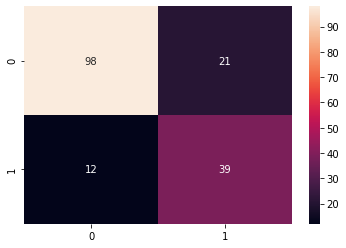

In [16]:
sns.heatmap(cm,annot=True)

# Tunning Parameter

In [17]:
#parameter
criterion=["gini","entropy"]
max_depth=list(range(1,11))
splitter=["best", "random"]
#parameter_grid
grid={"criterion":criterion,"max_depth":max_depth,"splitter":splitter}

#cv
from sklearn.model_selection import RepeatedStratifiedKFold
kfold_cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=5,random_state=0)

#grid_search_cv
from sklearn.model_selection import GridSearchCV
grid_cv=GridSearchCV(estimator=DT,param_grid=grid,cv=kfold_cv,scoring="accuracy",n_jobs=1)
res=grid_cv.fit(xtrain,ytrain)

In [18]:
res.best_params_

{'criterion': 'gini', 'max_depth': 7, 'splitter': 'best'}

In [19]:
res.best_score_

0.8097058823529412

In [20]:
pd.DataFrame({"Actual":ytest,"Predicted":ypred})

,Actual,Predicted
678,0,0
803,0,0
663,0,0
31,1,0
321,0,1
...,...,...
389,0,0
223,0,0
314,0,0
116,0,0


In [21]:
residual=ytest-ypred
residual

678    0
803    0
663    0
31     1
321   -1
      ..
389    0
223    0
314    0
116    0
506    0
Name: survived, Length: 170, dtype: int64

In [22]:
result=np.mean(residual)
result

-0.052941176470588235